In [1]:
import gym
import time
import torch
from torch import nn
import numpy as np
import copy
import random as rd
import matplotlib.pyplot as plt

from agent import Agent
from net import DeepQNet
from train import train

# Understanding the environment

In [2]:
env = gym.make('CartPole-v1')
env.reset()

for i_episode in range(1):
    observation = env.reset()
    for t in range(200):
        time.sleep(0.02)
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 33 timesteps


In [3]:
env.action_space

Discrete(2)

In [4]:
env.observation_space

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

In [5]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

# Deep Q Network

> https://towardsdatascience.com/qrash-course-deep-q-networks-from-the-ground-up-1bbda41d3677

> https://www.analyticsvidhya.com/blog/2019/04/introduction-deep-q-learning-python/

In [6]:
net = DeepQNet()
agent = Agent(net, env)
print(net)

DeepQNet(
  (mlp): Sequential(
    (0): Linear(in_features=4, out_features=24, bias=True)
    (1): Tanh()
    (2): Linear(in_features=24, out_features=2, bias=True)
  )
)


/home/rockl33/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Mean score over 50 last episodes: 20
Mean score over 50 last episodes: 21
Average Loss: 0.2094435989926569
Mean score over 50 last episodes: 24
Mean score over 50 last episodes: 77
Average Loss: 0.27199202951742335
Mean score over 50 last episodes: 67
Mean score over 50 last episodes: 98
Average Loss: 0.30351019590860234
Mean score over 50 last episodes: 96
Mean score over 50 last episodes: 143
Average Loss: 0.3321565033099614
Mean score over 50 last episodes: 139
Mean score over 50 last episodes: 179
Average Loss: 0.3518628022505436
Mean score over 50 last episodes: 217
Mean score over 50 last episodes: 238
Average Loss: 0.3669821060128743
Mean score over 50 last episodes: 205
Mean score over 50 last episodes: 268
Average Loss: 0.378978208207991
Mean score over 50 last episodes: 224
Mean score over 50 last episodes: 235
Average Loss: 0.38955736337578856
Mean score over 50 last episodes: 272
Mean score over 50 last episodes: 326
Average Loss: 0.39773753319124805
Mean score over 50 last

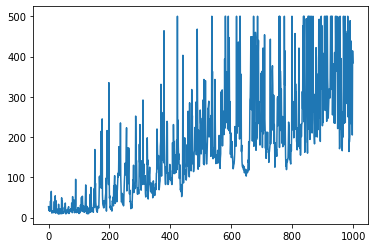

In [7]:
agent = train(n_episodes=1000, n_steps_max=2000, print_ever_k_episodes=50)

In [13]:
env = gym.make('CartPole-v1')
env.reset()

for i_episode in range(1):
    observation = env.reset()
    for t in range(1000):
        time.sleep(0.02)
        env.render()
        action = agent.act(observation, 500)
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 284 timesteps


# Pistes

> Implémenter UCB plutôt qu'epsilon greedy

> Hyperoptimisation (learning rate, architecture, epsilon, discount)

> Plus d'épisodes